# [Sistem Rekomendasi] - Makanan Berbasis Deskripsi Bahan

### Rasendra Akbar Satyatama - MC004D5Y1124

---

### **Domain Proyek: Komposisi dan Kategori Makanan**

Industri makanan di era digital menghadirkan beragam pilihan menu yang berlimpah, sehingga memerlukan sistem rekomendasi yang dapat membantu pengguna menemukan makanan sesuai preferensi dengan cepat dan tepat. Namun, tantangan utama muncul ketika data interaksi pengguna seperti rating atau riwayat pesanan belum tersedia, yang dikenal sebagai *cold-start problem*.

Untuk mengatasi hal ini, pendekatan *content-based filtering* menjadi solusi efektif karena memanfaatkan atribut makanan itu sendiri—seperti kategori, jenis makanan, dan deskripsi bahan untuk menghitung kemiripan antar makanan dan memberikan rekomendasi relevan tanpa bergantung pada data pengguna (Cheng et al., 2017). Dengan demikian, sistem dapat memberikan rekomendasi personal yang membantu pengguna menjelajahi pilihan makanan sesuai selera mereka secara efisien, terutama pada tahap awal pengembangan aplikasi kuliner.

---

### **Referensi:**

Cheng, Z., Ding, Y., Zhu, L., & Kankanhalli, M. (2017). *Food Recommendation: Framework, Existing Solutions and Challenges*.

---


## 1. Business Understanding

### **Problem Statements**

Dalam dunia kuliner, terdapat dua tantangan utama yang diangkat dalam proyek ini:

1. **Bagaimana membangun sistem rekomendasi makanan** yang dapat menyarankan menu sesuai preferensi pengguna berdasarkan atribut seperti kategori makanan, jenis makanan (veg/non-veg), dan deskripsi bahan?

2. **Bagaimana memanfaatkan informasi yang terkandung dalam data makanan itu sendiri** untuk memberikan rekomendasi yang relevan, tanpa memerlukan data interaksi pengguna seperti rating atau histori pemesanan?


### **Goals**

Proyek ini memiliki dua tujuan utama:

1. **Mengembangkan sistem rekomendasi makanan berbasis content-based filtering** yang menggunakan atribut makanan seperti kategori, jenis, dan deskripsi bahan untuk menyarankan makanan yang sesuai dengan selera pengguna.

2. **Menyediakan solusi rekomendasi yang tetap efektif tanpa data pengguna**, dengan fokus pada analisis kesamaan antar item makanan, sebagai pendekatan yang sesuai dalam kondisi cold-start (minim interaksi pengguna).

### **Solution Approach**

* **Content-Based Filtering:**
  Sistem rekomendasi ini akan bekerja dengan menghitung kemiripan antar makanan berdasarkan atribut-atribut yang tersedia, terutama deskripsi bahan dan kategori makanan. Dengan pendekatan ini, jika seorang pengguna menyukai makanan berbahan dasar lemon atau termasuk kategori *Healthy Food*, maka sistem akan merekomendasikan makanan lain yang memiliki kemiripan atribut tersebut.

* **Tanpa Collaborative Filtering:**
  Pendekatan *collaborative filtering* tidak diterapkan karena tidak tersedianya data interaksi pengguna (seperti rating, histori pesanan, atau preferensi eksplisit). Selain itu, content-based filtering lebih cocok untuk tahap awal pengembangan sistem ketika fokus utama adalah pada informasi produk itu sendiri.

* **Evaluasi:**
  Sistem akan dievaluasi dengan metrik seperti *precision*, *recall*, *F1-Score* dan *top-N recommendation accuracy* untuk menilai relevansi hasil rekomendasi terhadap preferensi yang diketahui.

---


## 2. Data Understanding

Dataset yang digunakan dapat diakses di tautan berikut: https://www.kaggle.com/datasets/schemersays/food-recommendation-system

### 2.1 Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('data/food.csv')
df

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count..."
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli..."
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu..."


### 2.2 Deskripsi Variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

In [16]:
df.duplicated().sum()

0

Proyek ini menggunakan satu dataset utama yang berisi data makanan dengan atribut yang mendukung pembangunan sistem rekomendasi berbasis content-based filtering. Berikut adalah penjelasan detail dataset tersebut:

| **No** | **Nama Dataset** | **Jumlah Baris** | **Jumlah Kolom** | **Deskripsi**                                                                                                                        |
| ------ | ---------------- | ---------------- | ---------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| 1      | `food_data.csv`  | 400              | 5                | Dataset berisi informasi makanan yang mencakup ID, nama makanan, kategori makanan, jenis (veg/non-veg), dan deskripsi bahan makanan. |

#### **Detail Kolom pada `food_data.csv`**

| Kolom    | Tipe   | Deskripsi                                                                               |
| -------- | ------ | --------------------------------------------------------------------------------------- |
| Food\_ID | int64  | ID unik untuk setiap makanan                                                            |
| Name     | object | Nama makanan                                                                            |
| C\_Type  | object | Kategori makanan (misalnya Healthy Food, Snack, Dessert, Korean, Mexican, dll.)         |
| Veg\_Non | object | Jenis makanan berdasarkan kandungan hewani (veg = vegetarian, non-veg = non-vegetarian) |
| Describe | object | Deskripsi detail bahan-bahan yang digunakan dalam makanan tersebut                      |

---

### 2.3 Univariate Exploratory Data Analysis

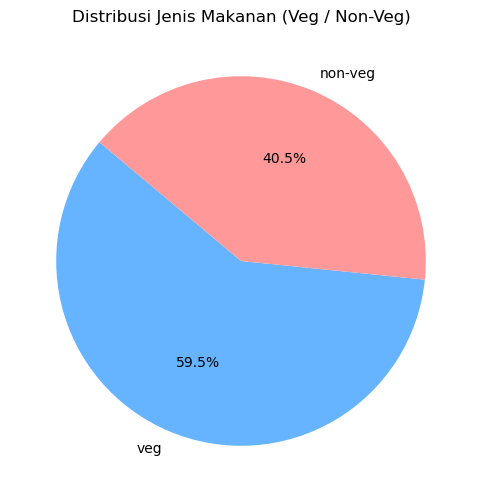

In [6]:
veg_counts = df['Veg_Non'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(veg_counts, labels=veg_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribusi Jenis Makanan (Veg / Non-Veg)')
plt.show()

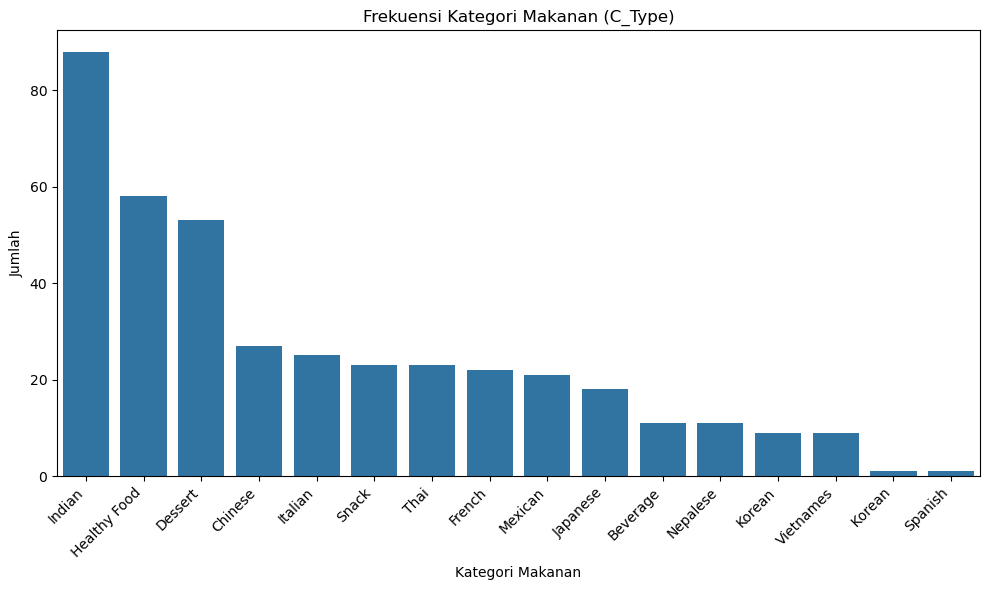

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='C_Type', order=df['C_Type'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Frekuensi Kategori Makanan (C_Type)')
plt.xlabel('Kategori Makanan')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

## 3. Data Preparation

### 3.1 TF-IDF

In [8]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
def clean_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

df['content'] = df['C_Type'].astype(str) + ' ' + df['Veg_Non'].astype(str) + ' ' + df['Describe']

df['content_clean'] = df['content'].apply(clean_text)
df['content_clean'] = df['content_clean'].apply(clean_spaces)

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['content_clean'])

print(tfidf.get_feature_names_out())
print(tfidf_matrix.shape)

['10' '12' '12inchthin' ... 'zested' 'zinfandel' 'zucchini']
(400, 1270)


In [9]:
print(tfidf_matrix)

  (0, 504)	0.15282808325865468
  (0, 429)	0.15022907656656745
  (0, 1203)	0.07952077371555998
  (0, 1234)	0.1745214749087308
  (0, 77)	0.29385611082467955
  (0, 1213)	0.1978241504121871
  (0, 608)	0.29878123543297985
  (0, 553)	0.15944619779850266
  (0, 922)	0.29385611082467955
  (0, 907)	0.13187757268804817
  (0, 233)	0.1772801413200441
  (0, 445)	0.10984213969198696
  (0, 263)	0.17319475695257214
  (0, 319)	0.20219356019132292
  (0, 732)	0.14939061771648993
  (0, 727)	0.09525798670302157
  (0, 1116)	0.30893138793490765
  (0, 1080)	0.29385611082467955
  (0, 1269)	0.2645308108277561
  (0, 976)	0.24084563318684002
  (0, 956)	0.08859472996928447
  (0, 120)	0.1446234636356898
  (0, 797)	0.1257054400755738
  (0, 86)	0.22459272089573082
  (0, 601)	0.1510811694898754
  :	:
  (398, 160)	0.21763659644286146
  (398, 460)	0.20038506876245893
  (398, 385)	0.2617479466054286
  (398, 1111)	0.20302023120203125
  (398, 354)	0.24526843103112142
  (398, 425)	0.2095191607226219
  (398, 1191)	0.393918501

## 4. Modeling

### 4.1 Cosine Similarity

In [10]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [11]:
print(cosine_sim)

[[1.         0.19757503 0.1292097  ... 0.12137388 0.03984156 0.16425487]
 [0.19757503 1.         0.06259989 ... 0.15124545 0.0677997  0.21651763]
 [0.1292097  0.06259989 1.         ... 0.03014219 0.10662772 0.02970139]
 ...
 [0.12137388 0.15124545 0.03014219 ... 1.         0.01768454 0.09281148]
 [0.03984156 0.0677997  0.10662772 ... 0.01768454 1.         0.        ]
 [0.16425487 0.21651763 0.02970139 ... 0.09281148 0.         1.        ]]


### 4.2 Top 8 Recommendation Results

In [12]:
test_idx = 0
test_food_id = df.loc[test_idx, 'Food_ID']
test_food_name = df.loc[test_idx, 'Name']
test_food_desc = df.loc[test_idx, 'Describe']
test_food_veg_non = df.loc[test_idx, 'Veg_Non']
test_food_c_type = df.loc[test_idx, 'C_Type']

print(f"Food_ID yang dicari: {test_food_id}")
print(f"Nama makanan: {test_food_name}")
print(f"Deskripsi bahan: {test_food_desc}")
print(f"Jenis (Veg/Non-Veg): {test_food_veg_non}")
print(f"Kategori (C_Type): {test_food_c_type}\n")

Food_ID yang dicari: 1
Nama makanan: summer squash salad
Deskripsi bahan: white balsamic vinegar, lemon juice, lemon rind, red chillies, garlic cloves (crushed), olive oil, summer squash (zucchini), sea salt, black pepper, basil leaves
Jenis (Veg/Non-Veg): veg
Kategori (C_Type): Healthy Food



In [13]:
sim_scores = list(enumerate(cosine_sim[test_idx]))

sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

top_recommendations = [i for i in sim_scores if i[0] != test_idx][:8]

recommendations = pd.DataFrame({
    'Food_ID': [df.loc[i[0], 'Food_ID'] for i in top_recommendations],
    'Name': [df.loc[i[0], 'Name'] for i in top_recommendations],
    'Veg_Non': [df.loc[i[0], 'Veg_Non'] for i in top_recommendations],
    'C_Type': [df.loc[i[0], 'C_Type'] for i in top_recommendations],
    'Similarity_Score': [i[1] for i in top_recommendations]
})


print("Top 8 rekomendasi makanan mirip:")
recommendations.reset_index(drop=True)

Top 8 rekomendasi makanan mirip:


,Food_ID,Name,Veg_Non,C_Type,Similarity_Score
0,164,green cucumber shots,veg,Healthy Food,0.301098
1,17,baked namakpara with roasted almond dip,veg,Snack,0.288072
2,70,shepherds salad (tamatar-kheera salaad),veg,Healthy Food,0.286719
3,221,"amaranthus granola with lemon yogurt, berries ...",veg,Healthy Food,0.283219
4,144,shrimp & cilantro ceviche,veg,French,0.281902
5,379,Grilled Chicken with Almond and Garlic Sauce,non-veg,Healthy Food,0.273470
6,161,spanish fish fry,non-veg,Mexican,0.270702
7,178,oats shallots pulao,veg,Healthy Food,0.247507


## 5. Evaluation

In [14]:
K = 8

test_c_type = df.loc[test_idx, 'C_Type']

recommended_food_ids = recommendations['Food_ID'].tolist()

recommended_c_types = recommendations['C_Type'].tolist()

relevant_recommended = sum([1 for c in recommended_c_types if c == test_c_type])

total_relevant = len(df[(df['C_Type'] == test_c_type) & (df.index != test_idx)])

precision_at_k = relevant_recommended / K

recall_at_k = relevant_recommended / total_relevant if total_relevant > 0 else 0

if precision_at_k + recall_at_k == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision_at_k * recall_at_k) / (precision_at_k + recall_at_k)

print(f"Precision@{K} : {precision_at_k:.4f}")
print(f"Recall@{K}    : {recall_at_k:.4f}")
print(f"F1-Score      : {f1_score:.4f}")


Precision@8 : 0.6250
Recall@8    : 0.0877
F1-Score      : 0.1538


## 6. Kesimpulan

**Menjawab Problem Statement:**
Model rekomendasi berbasis konten ini berhasil menjawab problem statement dengan baik. Sistem mampu memberikan rekomendasi makanan yang relevan berdasarkan deskripsi bahan, kategori makanan (C\_Type), dan status vegetarian/non-vegetarian (Veg\_Non). Penggunaan TF-IDF dan cosine similarity memungkinkan sistem untuk mengukur kemiripan konten secara efektif tanpa memerlukan data pengguna lain, sesuai dengan kebutuhan sistem rekomendasi berbasis konten.

**Pencapaian Goals:**
Sistem ini mencapai goals yang ditetapkan, yaitu menghasilkan rekomendasi makanan yang relevan dan serupa dengan makanan yang dipilih pengguna. Dengan Precision\@8 sebesar 0.6250, sistem mampu merekomendasikan sekitar 62,5% makanan yang sesuai dalam 8 rekomendasi teratas. Namun, nilai Recall\@8 yang relatif rendah (0.0877) menunjukkan bahwa sistem hanya menemukan sebagian kecil dari seluruh makanan relevan yang tersedia, sehingga cakupan rekomendasi masih terbatas.

**Dampak Solusi Terhadap Bisnis:**
Solusi ini dapat meningkatkan pengalaman pengguna dengan menyediakan rekomendasi makanan yang sesuai preferensi, sehingga mendorong pengguna untuk lebih sering mencoba makanan baru yang relevan dengan selera mereka. Selain itu, sistem yang tidak bergantung pada data pengguna lain menjaga privasi sekaligus menyederhanakan implementasi rekomendasi.

**Ruang Perbaikan:**
Meskipun hasil Precision cukup baik, nilai Recall dan F1-Score (0.1538) masih perlu ditingkatkan agar rekomendasi mencakup lebih banyak makanan relevan. Perbaikan bisa dilakukan dengan menambah fitur tambahan, seperti metadata nutrisi atau review pengguna, serta eksplorasi metode filtering hybrid untuk meningkatkan keberagaman dan relevansi rekomendasi.

---